In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')


In [185]:
df=pd.read_csv("titanic_train.csv")

In [186]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [187]:
df.shape

(891, 12)

In [188]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Most of the cabin data is null so it is better to drop this column

In [191]:
df.drop(columns=['Cabin'],inplace=True)

In [192]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

"Survived" - Target / Label column has 2 categories / classes.

"sex" - Feature column has 2 categories / classes.

"Pclass" - Feature column has 2 categories / classes.

"Embarked" - Feature column has 3 categories / classes.

"SibSp" - Feature column has 7 discrete values.

"Parch" - Feature column has 7 discrete values.

Cabin is unnecessary feature with missing value so we can drop column Cabin.

In [194]:
df.drop(columns=['Ticket'],inplace = True)

In [195]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Out of 891 passengers only 342 survived

In [196]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Female survival rate is more than male

In [197]:
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

Pclass 1 survival rate is maximum

In [198]:
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract("([A-Za-z]+)\.")

In [199]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [200]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [201]:
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                      ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [202]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling NAN ages

In [203]:
df.loc[(df.Age.isnull() & (df.Initial)=='Mr'), 'Age'].fillna(32.73,inplace = True)

In [204]:
df.loc[((df.Age.isnull())&(df.Initial)=='Mrs'), 'Age']=35.98

In [205]:
df.loc[((df.Age.isnull())&(df.Initial)=='Master'), 'Age']=4.57

In [206]:
df.loc[((df.Age.isnull())&(df.Initial)=='Miss'), 'Age']=21.86

In [207]:
df.loc[((df.Age.isnull())&(df.Initial)=='Other'), 'Age']=45.889

In [208]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [209]:
index_NaN_age = list(df["Age"][df["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['SibSp'] == df.iloc[i]["SibSp"]) & (df['Parch'] == df.iloc[i]["Parch"]) & (df['Pclass'] == df.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].iloc[i] = age_pred
    else :
        df['Age'].iloc[i] = age_med

In [210]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,13.5,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [211]:
pd.crosstab([df.SibSp],[df.Survived],margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


PassengerId       Axes(0.125,0.53;0.110714x0.35)
Survived       Axes(0.257857,0.53;0.110714x0.35)
Pclass         Axes(0.390714,0.53;0.110714x0.35)
Age            Axes(0.523571,0.53;0.110714x0.35)
SibSp          Axes(0.656429,0.53;0.110714x0.35)
Parch          Axes(0.789286,0.53;0.110714x0.35)
Fare              Axes(0.125,0.11;0.110714x0.35)
dtype: object

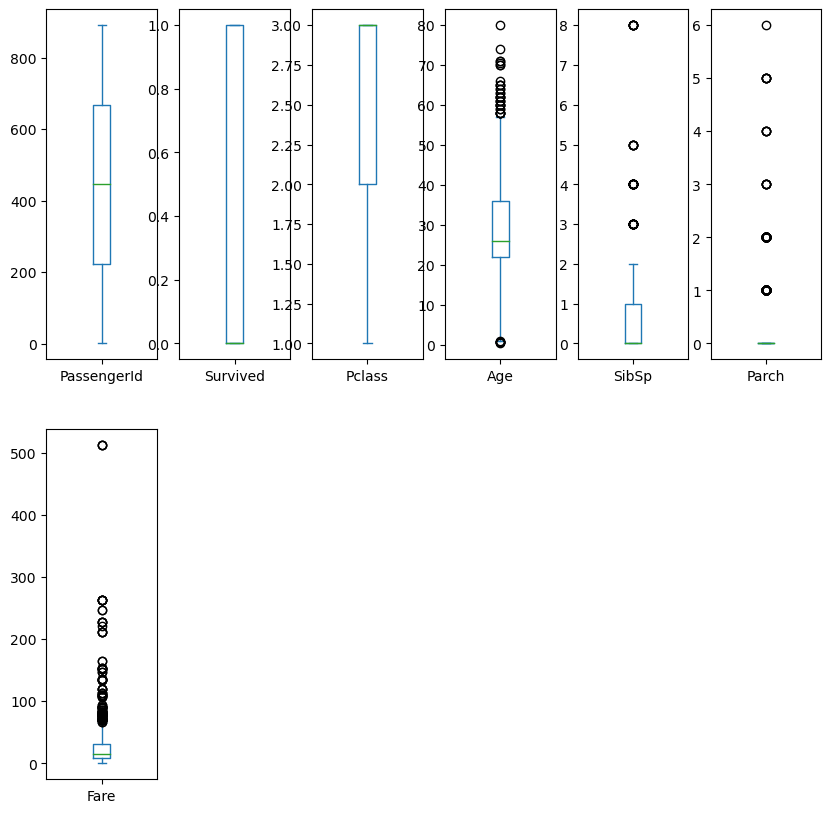

In [212]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))


We can see the presence of outliers in age and fare,sibsp,parch

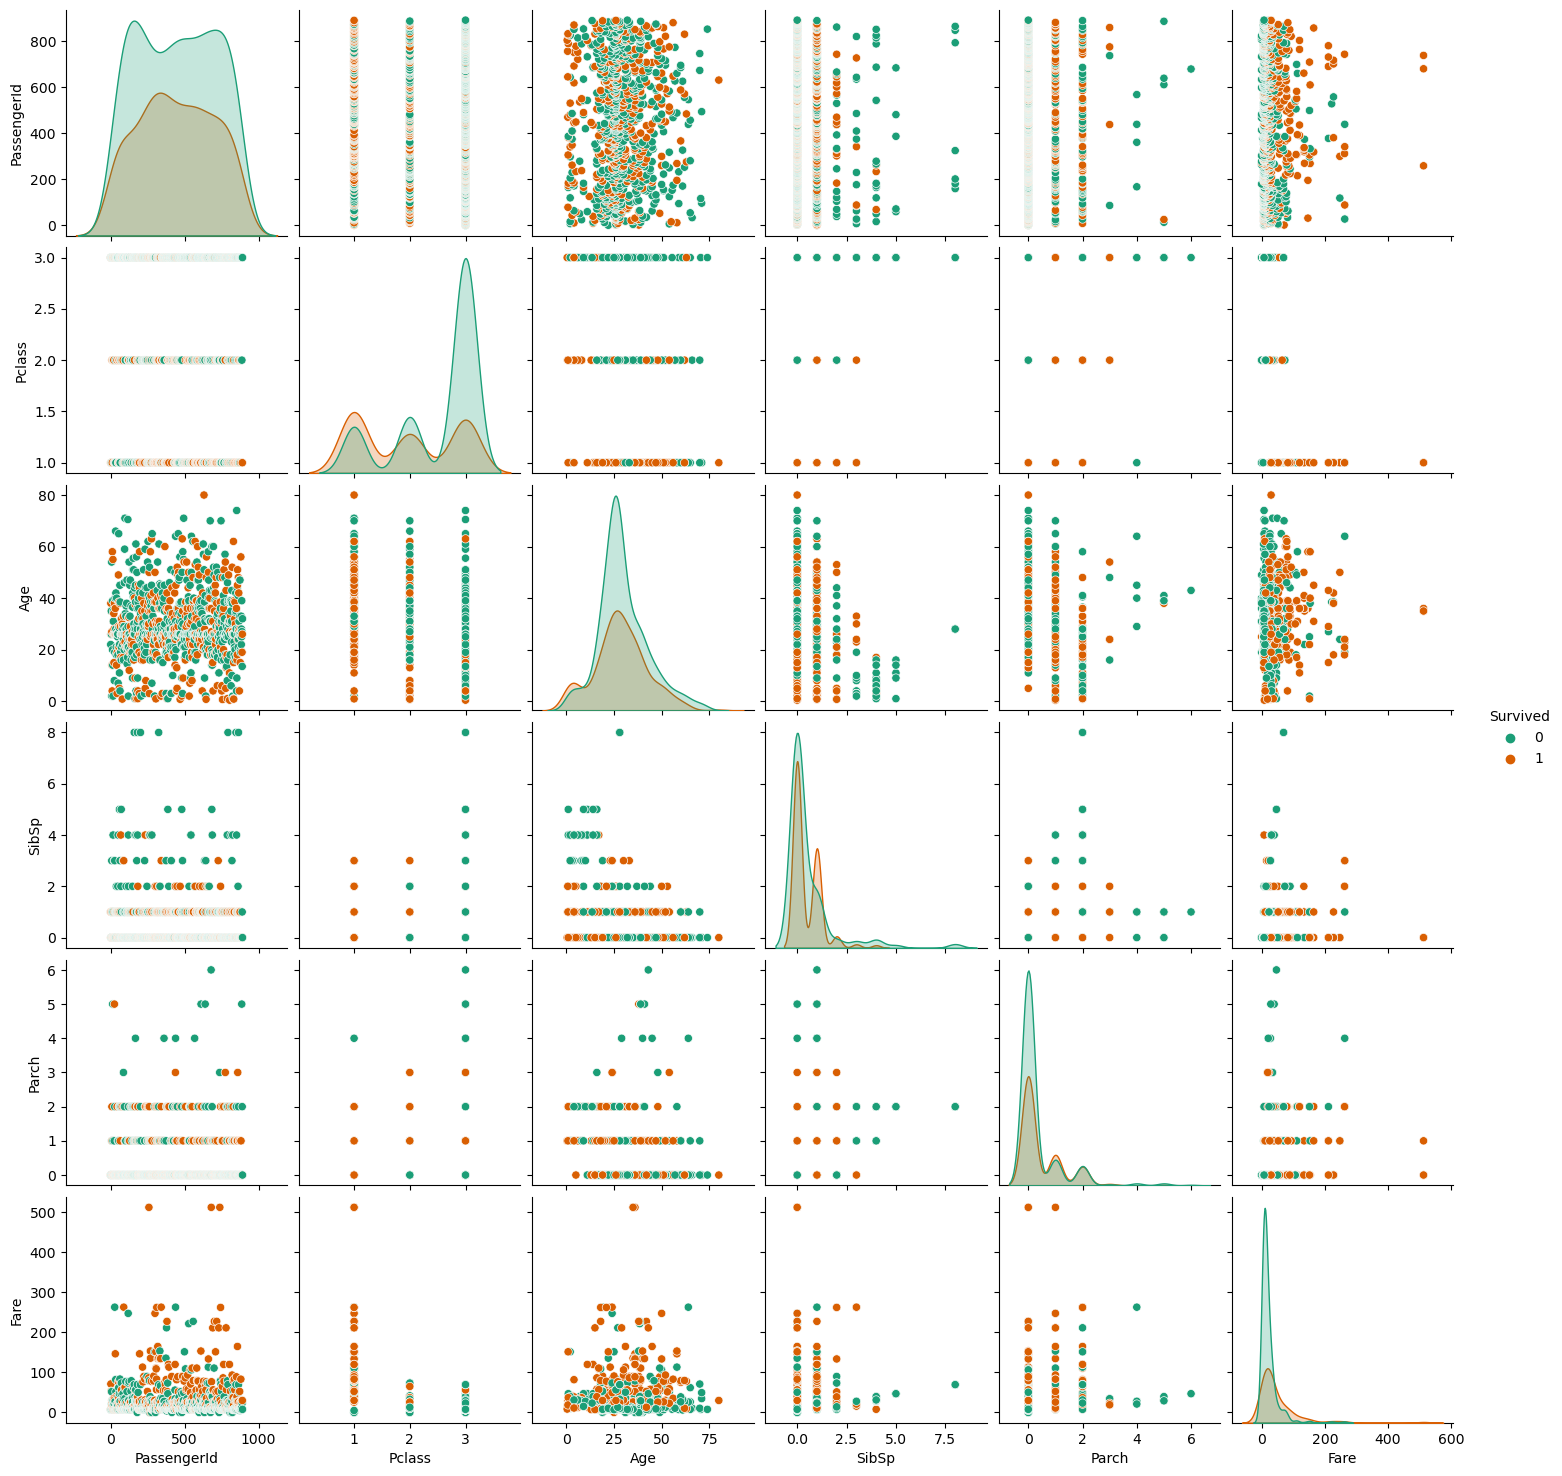

In [213]:
sns.pairplot(df,hue="Survived",palette="Dark2")
plt.show()

In [214]:
from scipy.stats import f_oneway
from scipy.stats import zscore

In [215]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked', 'Initial']

In [216]:
df.shape

(891, 11)

In [217]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2


In [218]:
z=np.abs(zscore(df[Numerical_features]))

In [219]:
z

,Survived,Pclass,SibSp,Parch,Age,Fare
0,0.789272,0.827377,0.432793,0.473674,0.545734,0.502445
1,1.266990,1.566107,0.432793,0.473674,0.655962,0.786845
2,1.266990,0.827377,0.474545,0.473674,0.245310,0.488854
3,1.266990,1.566107,0.432793,0.473674,0.430644,0.420730
4,0.789272,0.827377,0.474545,0.473674,0.430644,0.486337
...,...,...,...,...,...,...
886,0.789272,0.369365,0.474545,0.473674,0.170204,0.386671
887,1.266990,1.566107,0.474545,0.473674,0.771053,0.044381
888,0.789272,0.827377,0.432793,2.008933,1.184136,0.176263
889,1.266990,1.566107,0.474545,0.473674,0.245310,0.044381


In [220]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([3, 2, 3, 5, 2, 2, 2, 2, 3, 5, 4, 4, 5, 2, 2, 2, 3, 2, 2, 2, 2, 2,
       5, 2, 2, 2, 5, 5, 2, 5, 3, 5, 5, 2, 3, 3, 5, 2, 4, 5, 2, 2, 5, 3,
       3, 4, 3, 4, 3, 5, 2, 2, 5, 5, 5, 5, 3, 5, 5, 4, 3, 5, 2, 2, 2, 2,
       2, 2, 4, 3, 2, 3], dtype=int64))


In [221]:
df=df[(z<3).all(axis=1)]

In [222]:
df.shape

(820, 11)

removal of outliers

Using encoder

In [223]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    df[i] = le.fit_transform(df[i])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,2


In [224]:
df.drop(columns=['Name','PassengerId'],inplace=True)

In [225]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,3
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,3
4,0,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,4
887,1,1,0,19.0,0,0,30.0000,2,1
888,0,3,0,13.5,1,2,23.4500,2,1
889,1,1,1,26.0,0,0,30.0000,0,2


Setting input and target label

In [226]:
x=df.iloc[:,1:10]

In [227]:
y=df.iloc[:,0]

In [228]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,3,1,22.0,1,0,7.2500,2,2
1,1,0,38.0,1,0,71.2833,0,3
2,3,0,26.0,0,0,7.9250,2,1
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2,4
887,1,0,19.0,0,0,30.0000,2,1
888,3,0,13.5,1,2,23.4500,2,1
889,1,1,26.0,0,0,30.0000,0,2


In [229]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 820, dtype: int64

Machine Learning

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [231]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (615, 8)
Training target vector size: (615,)
Test feature matrix size: (205, 8)
Test target vector size: (205,)


In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8373983739837398 on Random_state 63


In [236]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, x, y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.78658537 0.79268293 0.7804878  0.79878049 0.82317073]
Mean CV Score : 0.7963414634146342
Std deviation : 0.014735421919017742


In [237]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.7845528455284553


Confusion matrix of Random Forest Classifier : 
 [[125  31]
 [ 22  68]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       156
           1       0.69      0.76      0.72        90

    accuracy                           0.78       246
   macro avg       0.77      0.78      0.77       246
weighted avg       0.79      0.78      0.79       246



In [238]:
Final_mod = LogisticRegression(fit_intercept =True,penalty= "l2",solver='newton-cg',random_state= 69)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)

In [239]:
import joblib
joblib.dump(Final_mod,'Titanic_Survival_Project.pkl')

['Titanic_Survival_Project.pkl']

In [240]:
prediction = Final_mod.predict(X_test)

In [241]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
